In [2]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [3]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import streamlit as st
import warnings

In [4]:
warnings.simplefilter("ignore")

In [5]:
#datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [6]:
# Combine train and test data for consistent preprocessing
data = pd.concat([train_df, test_df], axis=0)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
#data structure
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(1309, 12)


In [10]:
data.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
data[data.duplicated()] #duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
# Droping unnecessary columns
data.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

In [15]:
# Convert Survived column to int (only in training data)
data.iloc[:train_df.shape[0], data.columns.get_loc('Survived')] = data.iloc[:train_df.shape[0], data.columns.get_loc('Survived')].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


# handling null values

In [17]:
#check for missing values
data.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Sex,0
Age,263
SibSp,0
Parch,0
Fare,1
Embarked,2


In [18]:
data.isna().sum().sum()

684

In [19]:
data.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,True,False,False,False,False
414,False,True,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False
416,False,True,False,False,True,False,False,False,False


In [20]:
data.notnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
413,True,False,True,True,False,True,True,True,True
414,True,False,True,True,True,True,True,True,True
415,True,False,True,True,True,True,True,True,True
416,True,False,True,True,False,True,True,True,True


<Axes: >

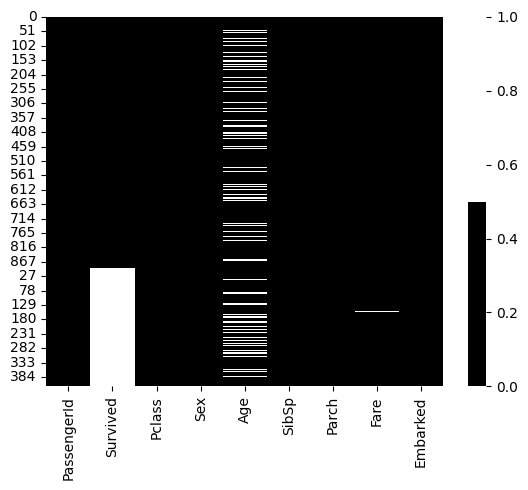

In [21]:
cols = data.columns
colours = ['black', 'white']#specify the colours - white is missing. black is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=colours)

In [22]:
data[data.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0.0,3,male,NaN,0,0,8.4583,Q
17,18,1.0,2,male,NaN,0,0,13.0000,S
19,20,1.0,3,female,NaN,0,0,7.2250,C
26,27,0.0,3,male,NaN,0,0,7.2250,C
28,29,1.0,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C
415,1307,NaN,3,male,38.5,0,0,7.2500,S
416,1308,NaN,3,male,NaN,0,0,8.0500,S


# encoding

In [23]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [24]:
#one hot-encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [25]:
print(data.dtypes)


PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


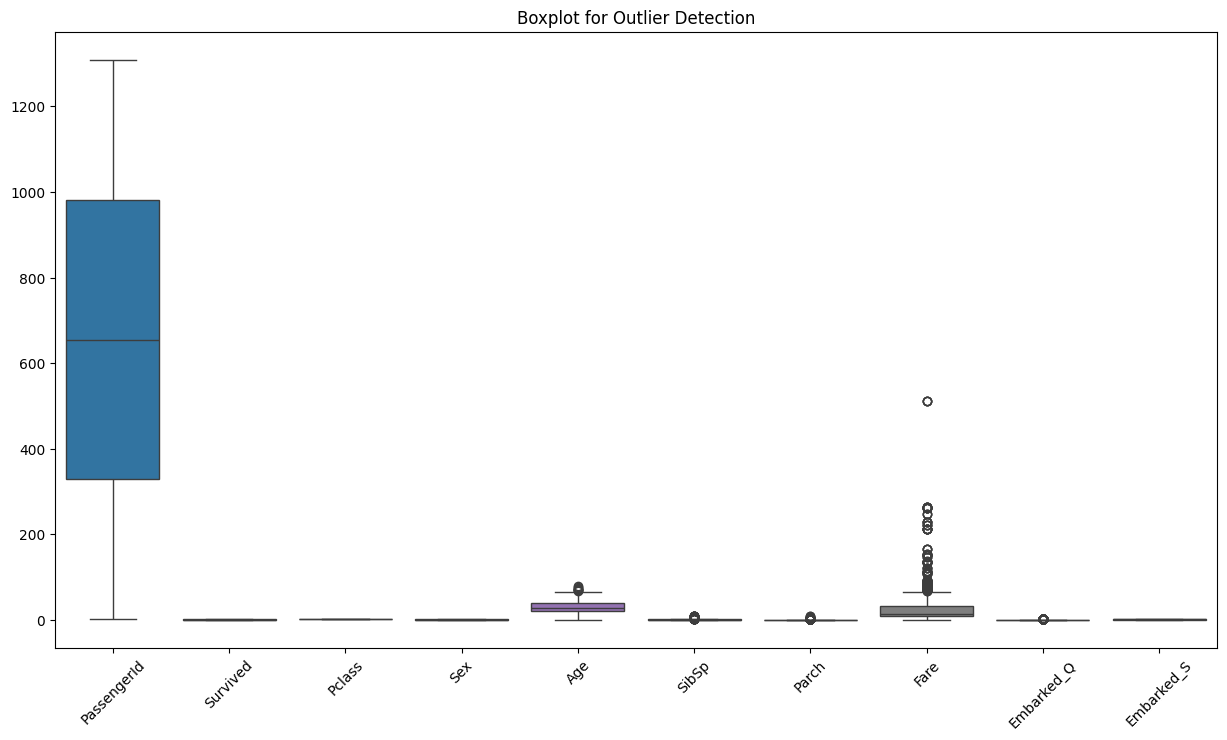

In [26]:
#checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [27]:
Age_med = data["Age"].median()
data.loc[:, "Age"] = data["Age"].fillna(Age_med) #imputing the null value #replacing the null value with median of the column because of outliers

In [28]:
SibSp_med = data["SibSp"].median()
data.loc[:, "SibSp"] = data["SibSp"].fillna(SibSp_med) #imputing the null value #replacing the null value with median of the column because of outliers

In [29]:
Parch_med = data["Parch"].median()
data.loc[:, "Parch"] = data["Parch"].fillna(Parch_med) #imputing the null value #replacing the null value with median of the column because of outliers

In [30]:
Fare_med = data["Fare"].median()
data.loc[:, "Fare"] = data["Fare"].fillna(Fare_med) #imputing the null value #replacing the null value with median of the column because of outliers

In [31]:
data.info() #checking null value

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked_Q   1309 non-null   bool   
 9   Embarked_S   1309 non-null   bool   
dtypes: bool(2), float64(3), int64(5)
memory usage: 94.6 KB


# correlation matrix

In [32]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.025799,-0.055224,0.008942,0.031128,0.011585,-0.047923
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.155660
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.377908,0.060832,0.018322,-0.558683,0.230491,0.096335
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.053663,0.109609,0.213125,0.185681,0.088651,-0.119504
Age,0.025799,-0.064910,-0.377908,-0.053663,1.000000,-0.189972,-0.125851,0.178182,-0.031132,-0.051625
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.189972,1.000000,0.373587,0.160349,-0.048678,0.075198
Parch,0.008942,0.081629,0.018322,0.213125,-0.125851,0.373587,1.000000,0.221635,-0.100943,0.073258
Fare,0.031128,0.257307,-0.558683,0.185681,0.178182,0.160349,0.221635,1.000000,-0.129958,-0.172829
Embarked_Q,0.011585,0.003650,0.230491,0.088651,-0.031132,-0.048678,-0.100943,-0.129958,1.000000,-0.489874
Embarked_S,-0.047923,-0.155660,0.096335,-0.119504,-0.051625,0.075198,0.073258,-0.172829,-0.489874,1.000000


# outliers removing

[3.0, 54.0]

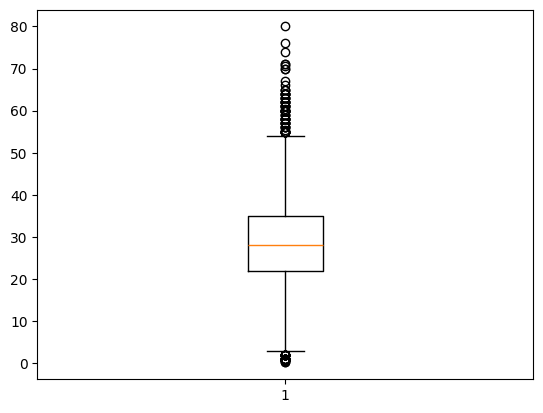

In [33]:
box_Age=plt.boxplot(data['Age'])
[item.get_ydata()[1] for item in box_Age['whiskers']]

In [34]:
data.loc[data.Age>54.0,"Age"]=54.0 #upper extreme
data.loc[data.Age<3.0,"Age"]=3.0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7df3fd6baa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7df3fd6c4150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df3fd6b9e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7df3fd6c58d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df3fd6c6410>],
 'means': []}

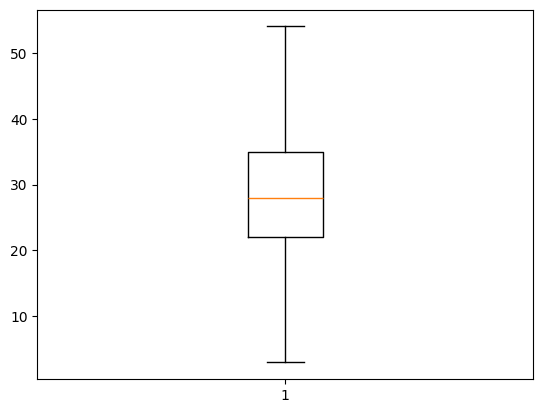

In [35]:
plt.boxplot(data['Age'])

[0.0, 2.0]

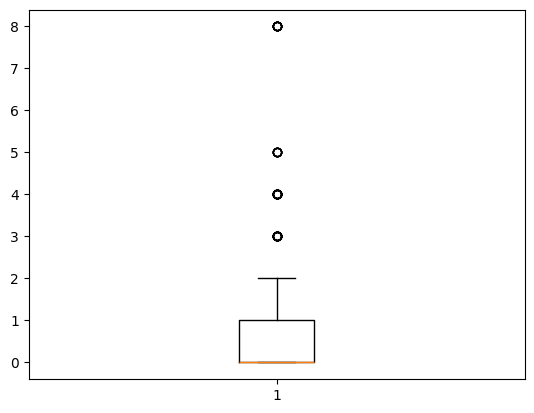

In [36]:
box_SibSp=plt.boxplot(data['SibSp'])
[item.get_ydata()[1] for item in box_SibSp['whiskers']]

In [37]:
data.loc[data.SibSp>2.0,"SibSp"]=2.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7df3fd57ced0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df3fd57e610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df3fd57c310>],
 'medians': [<matplotlib.lines.Line2D at 0x7df3fd57fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df3fd5845d0>],
 'means': []}

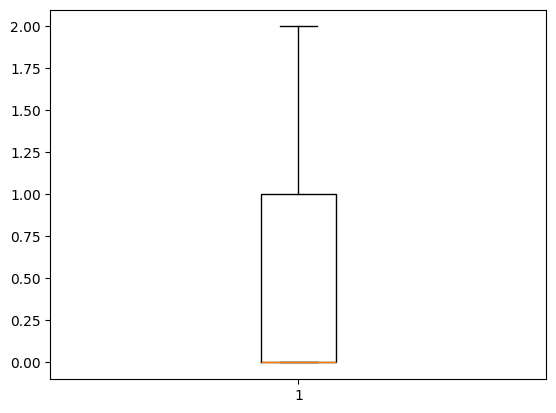

In [38]:
plt.boxplot(data['SibSp'])

[0.0, 0.0]

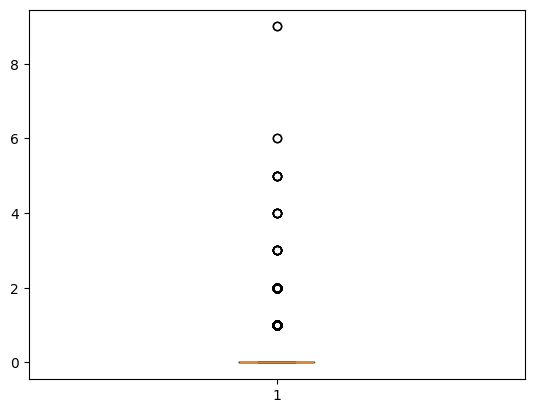

In [39]:
box_Parch=plt.boxplot(data['Parch'])
[item.get_ydata()[1] for item in box_Parch['whiskers']]

In [40]:
data.loc[data.Parch>0.0,"Parch"]=0.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7df3fd450450>,
 'caps': [<matplotlib.lines.Line2D at 0x7df3fd451b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df3fd447910>],
 'medians': [<matplotlib.lines.Line2D at 0x7df3fd453310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df3fd453e50>],
 'means': []}

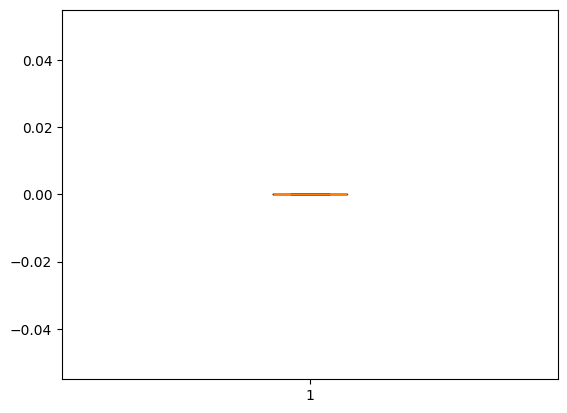

In [41]:
plt.boxplot(data['Parch'])

[0.0, 65.0]

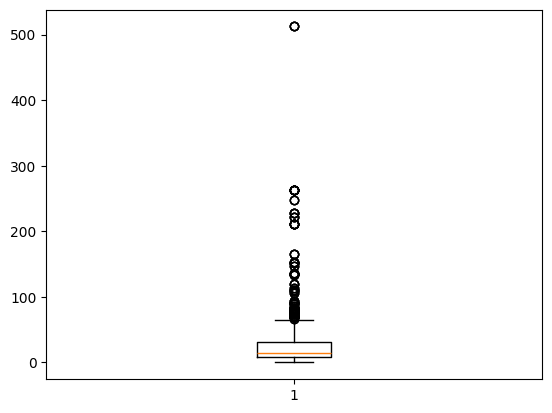

In [42]:
box_Fare=plt.boxplot(data['Fare'])
[item.get_ydata()[1] for item in box_Fare['whiskers']]

In [43]:
data.loc[data.Fare>65.0,"Fare"]=65.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7df3fd5009d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df3fd5022d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df3fd4efdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df3fd503bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df3fd5086d0>],
 'means': []}

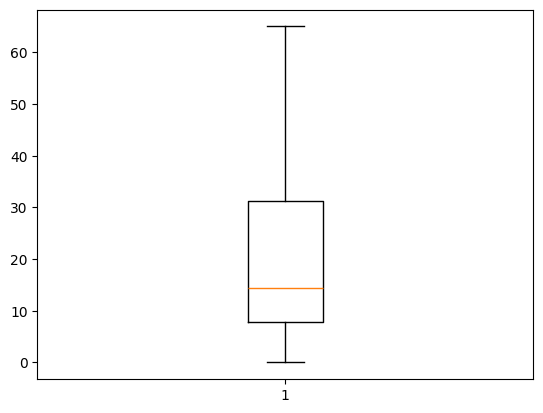

In [44]:
plt.boxplot(data['Fare'])

[0.0, 0.0]

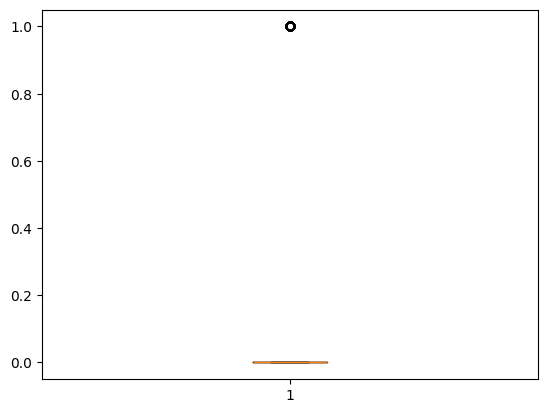

In [45]:
data['Embarked_Q'] = data['Embarked_Q'].astype(int)

box_Embarked_Q = plt.boxplot(data['Embarked_Q'])
[item.get_ydata()[1] for item in box_Embarked_Q['whiskers']]

In [46]:
data.loc[data.Embarked_Q>0.0,"Embarked_Q"]=0.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7df3fd3d4390>,
 'caps': [<matplotlib.lines.Line2D at 0x7df3fd3d5b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df3fd3c7750>],
 'medians': [<matplotlib.lines.Line2D at 0x7df3fd3d7050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df3fd3d7b10>],
 'means': []}

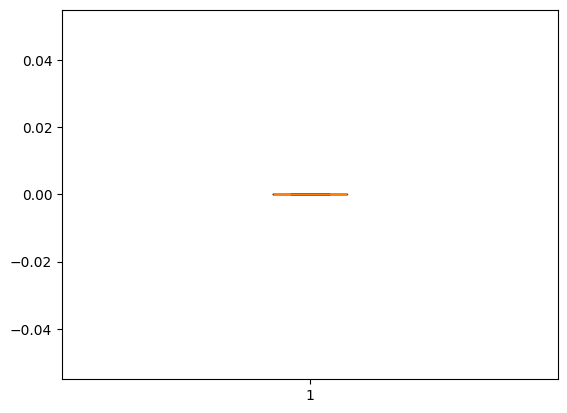

In [47]:
plt.boxplot(data['Embarked_Q'])

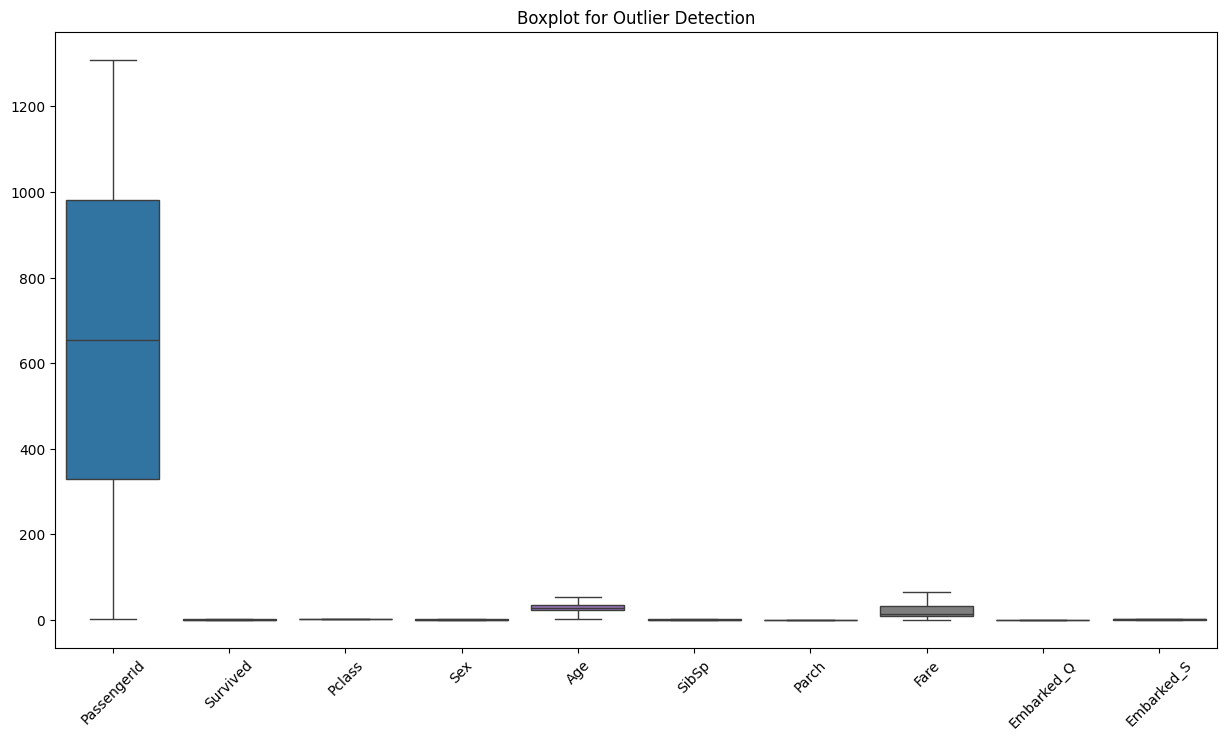

In [48]:
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

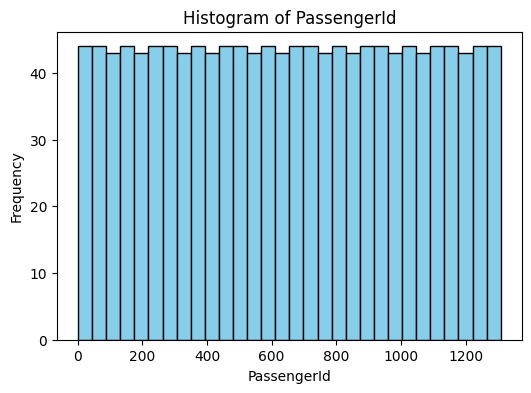

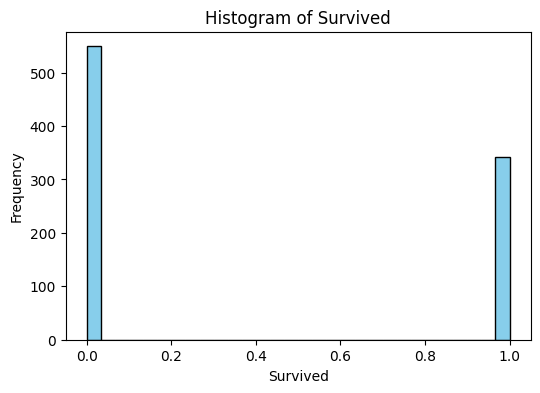

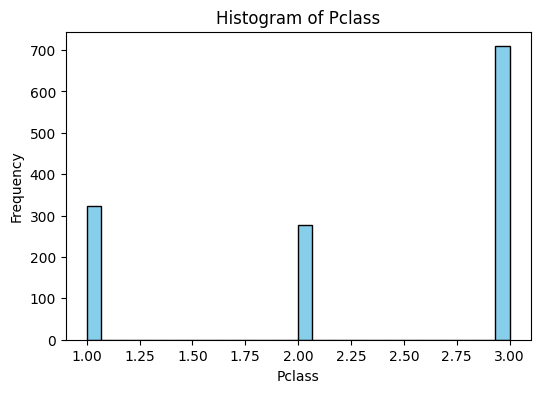

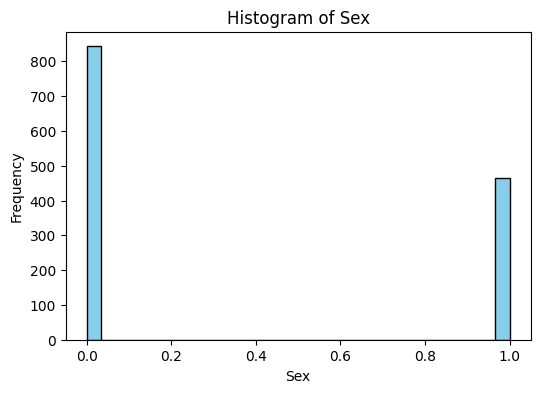

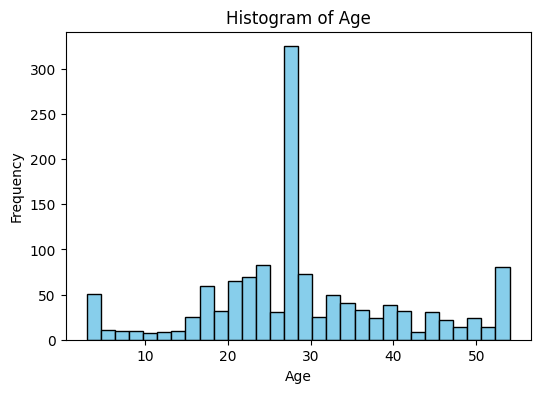

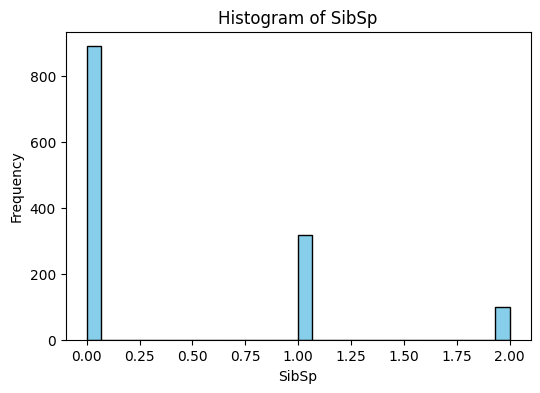

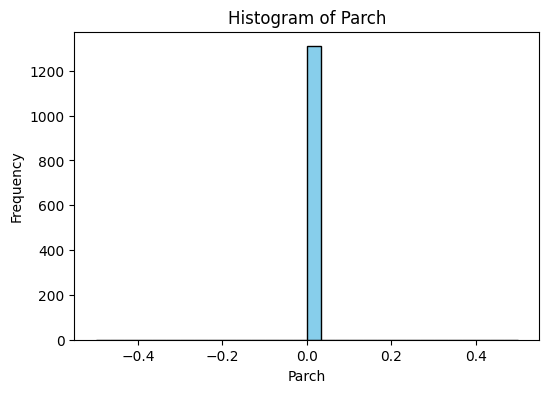

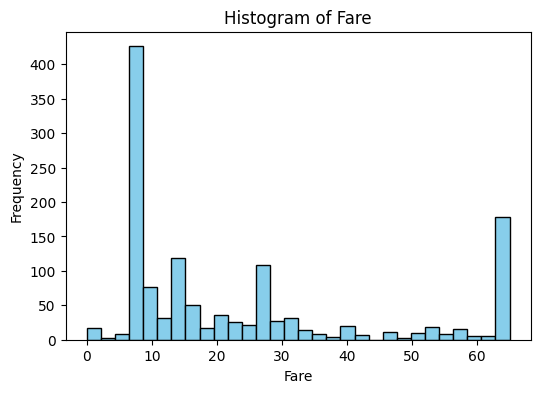

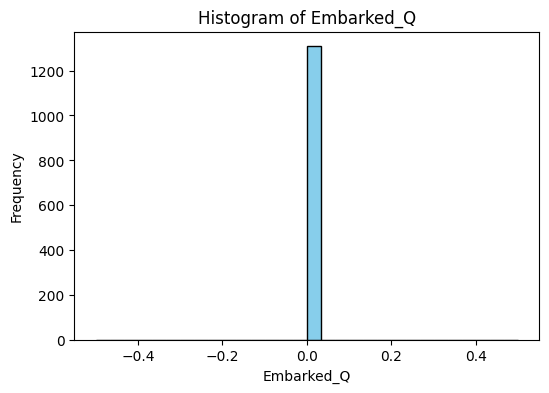

In [49]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Ploting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# Scatterplot between variables along with histograms

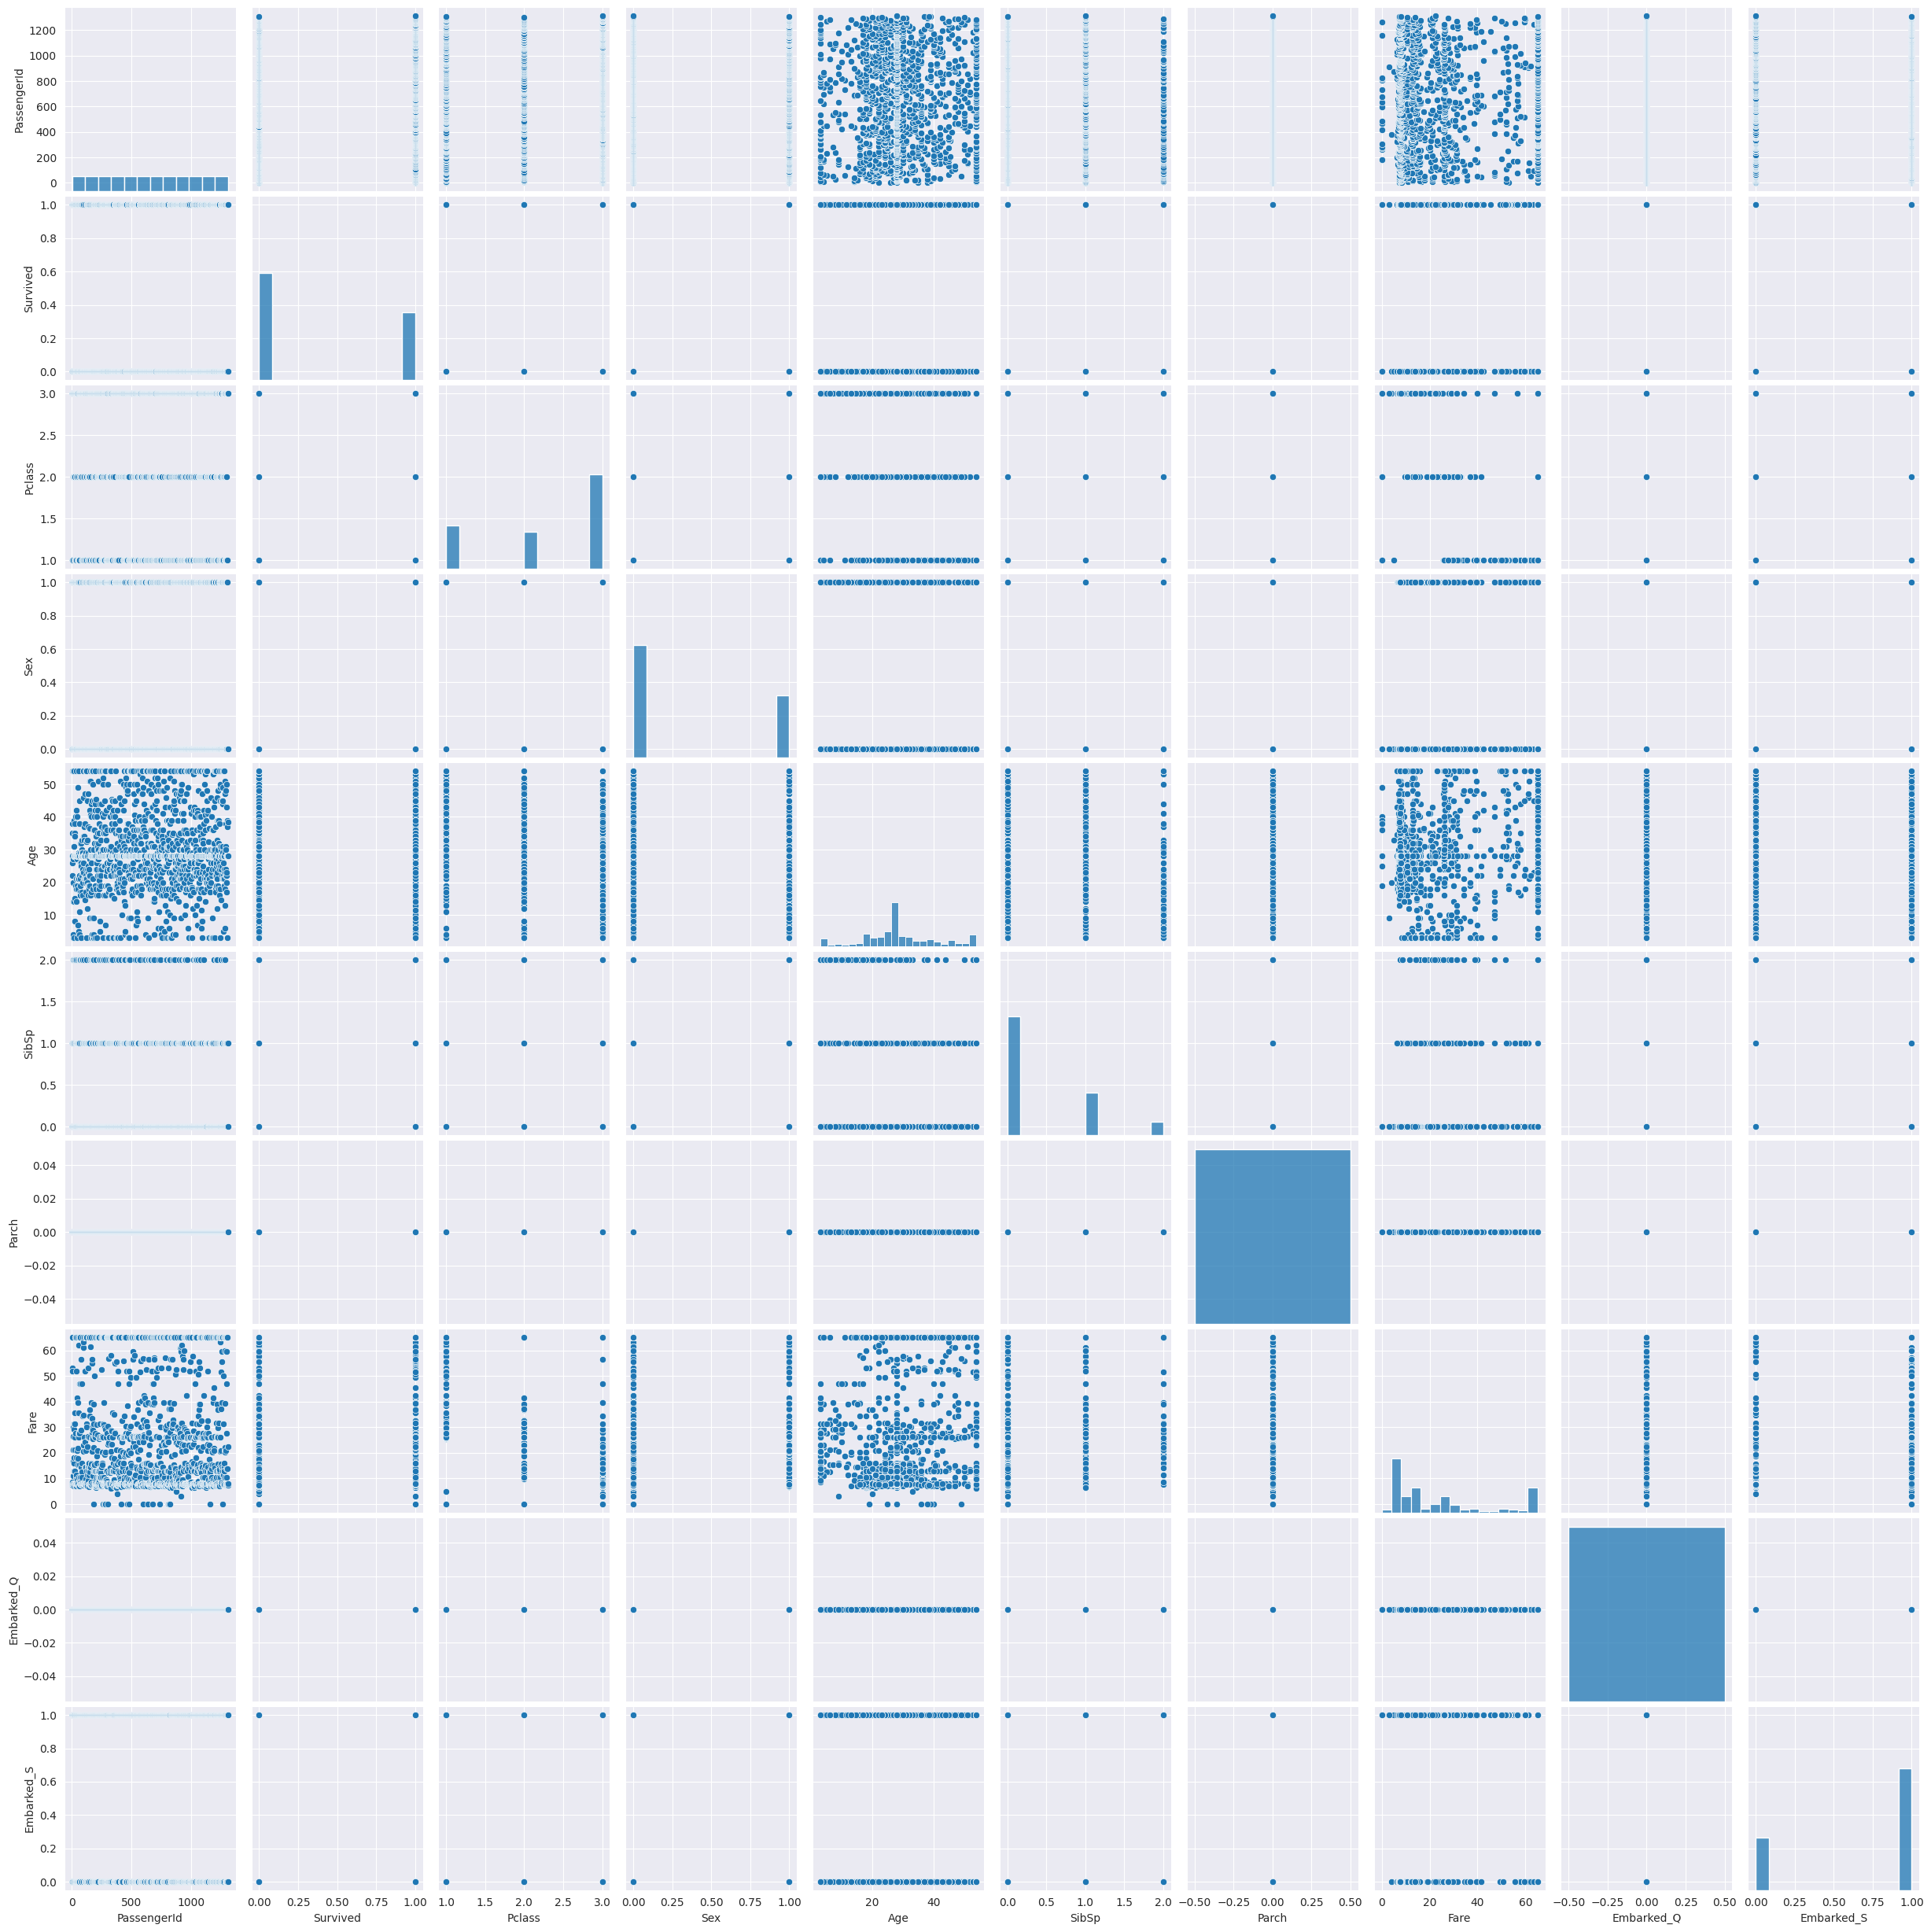

In [50]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# model training

In [51]:
# Separate train and test data properly
train_data = data.iloc[:train_df.shape[0]].copy()  # First 891 rows (train set)
test_data = data.iloc[train_df.shape[0]:].copy()   # Remaining rows (test set)

# Define Features (X) and Target (y)
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

In [52]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Model Predictions
y_pred = log_reg.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
#model training
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       105
         1.0       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [63]:
# Check class distribution
train_data['Survived'].value_counts(normalize=True)  # Proportion of survivors vs. non-survivors


,proportion
Survived,
0.0,0.616162
1.0,0.383838


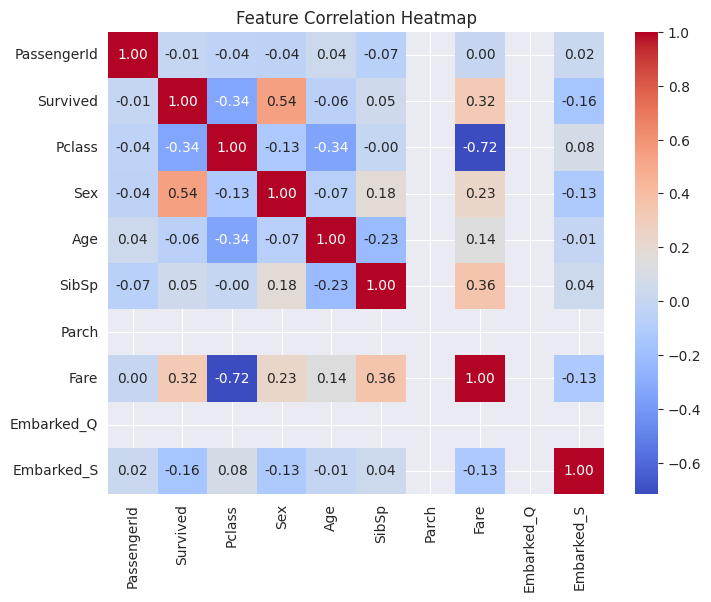

In [64]:
#correlation of features with Survived
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [65]:
print("Train Accuracy:", log_reg.score(X_train, y_train))
print("Test Accuracy:", log_reg.score(X_test, y_test))


Train Accuracy: 0.7963483146067416
Test Accuracy: 0.8044692737430168


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Accuracy: 0.8156424581005587


# interpretation

In [69]:
# Extracting coefficients and feature names
feature_names = X.columns
coefficients = log_reg.coef_[0]

# Created a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display
coef_df

,Feature,Coefficient
2,Sex,1.242575
0,PassengerId,0.087528
6,Fare,0.074091
5,Parch,0.000000
7,Embarked_Q,0.000000
8,Embarked_S,-0.208407
4,SibSp,-0.211484
3,Age,-0.373436
1,Pclass,-0.821891


In [70]:
# Converting coefficients to odds ratios
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Display
print(coef_df)

       Feature  Coefficient  Odds Ratio
2          Sex     1.242575    3.464524
0  PassengerId     0.087528    1.091472
6         Fare     0.074091    1.076905
5        Parch     0.000000    1.000000
7   Embarked_Q     0.000000    1.000000
8   Embarked_S    -0.208407    0.811876
4        SibSp    -0.211484    0.809382
3          Age    -0.373436    0.688365
1       Pclass    -0.821891    0.439600


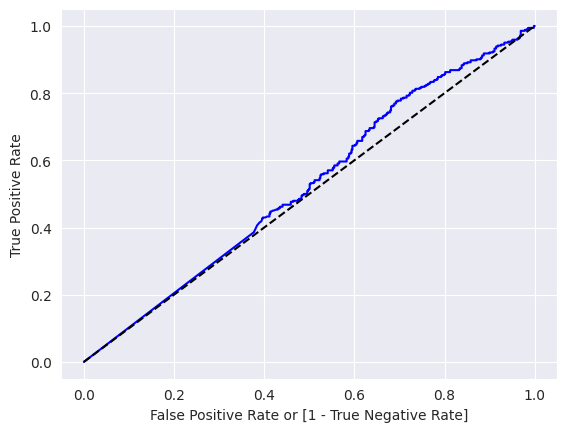

In [73]:
fpr, tpr, thresholds = roc_curve(y, log_reg.predict_proba(X)[:, 1])

# Get predictions for the entire dataset
y_pred_full = log_reg.predict(X)  # Predictions for all 891 samples in X

# Calculate AUC using predictions for the entire dataset
auc = roc_auc_score(y, y_pred_full)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
auc

0.519652957530438

# Visualizing the Logistic Regression Coefficients

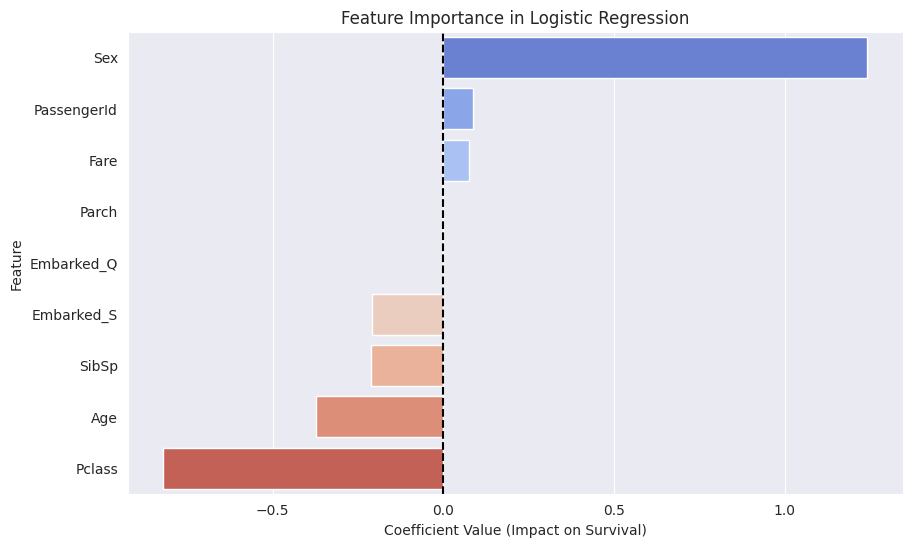

In [74]:
# Visualizing the Logistic Regression Coefficients

# Creating a DataFrame for better visualization
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)  # Sorting by impact

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.axvline(x=0, color='black', linestyle='--')  # Reference line at 0
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Coefficient Value (Impact on Survival)")
plt.ylabel("Feature")
plt.show()


# Interview question:

**Difference Between Precision and Recall:**
Precision and recall are both important metrics for evaluating classification models. Firstly, Out of all predicted positives, how many were actually positive is known as precision. Lastly, Out of all actual positives, how many were correctly predicted.
**For instance:** Out of all passengers the model predicted as survived, but how many actually survived is precision and out of all passengers who actually survived, how many did the model correctly predict is recall.

# What is cross-validation, and why is it important in binary classification?

**Cross validation is a process used to evaluate a machine learning model performance by splitting the dataset into multiple parts for training and testing**

# Cross validation important in Binary Classification:

1. **reduce overfitting**
2. **regularization strength in logistic regression**

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
# Applying 5-Fold Cross-Validation
log_reg = LogisticRegression()
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.76536313 0.78089888 0.76966292 0.76404494 0.80337079]
Mean Accuracy: 0.7766681313163016


In [77]:
# Creating a new feature 'FamilySize' (SibSp + Parch + 1)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Extracting Titles from Names
data['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplifying Titles
data['Title'] = data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Other')

# One-Hot Encoding the Title column
data = pd.get_dummies(data, columns=['Title'], drop_first=True)


In [78]:
from imblearn.over_sampling import SMOTE

# Splitting the dataset again
X = data.iloc[:train_df.shape[0]].drop(columns=['Survived'])
y = train_df['Survived']

# Applying SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [79]:
from sklearn.model_selection import GridSearchCV

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best Random Forest Model
best_rf = grid_search.best_estimator_

# Evaluate on Test Set
X_test_final = data.iloc[train_df.shape[0]:].drop(columns=['Survived'])
y_pred_rf = best_rf.predict(X_test_final)


In [80]:
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_resampled, best_rf.predict(X_resampled)))

Random Forest Accuracy: 0.8897996357012751


In [81]:
# Classification Report
print("Classification Report:\n", classification_report(y_resampled, best_rf.predict(X_resampled)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       549
           1       0.91      0.86      0.89       549

    accuracy                           0.89      1098
   macro avg       0.89      0.89      0.89      1098
weighted avg       0.89      0.89      0.89      1098



In [82]:
# Classification Report
print("Classification Report:\n", classification_report(y_resampled, best_rf.predict(X_resampled)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       549
           1       0.91      0.86      0.89       549

    accuracy                           0.89      1098
   macro avg       0.89      0.89      0.89      1098
weighted avg       0.89      0.89      0.89      1098



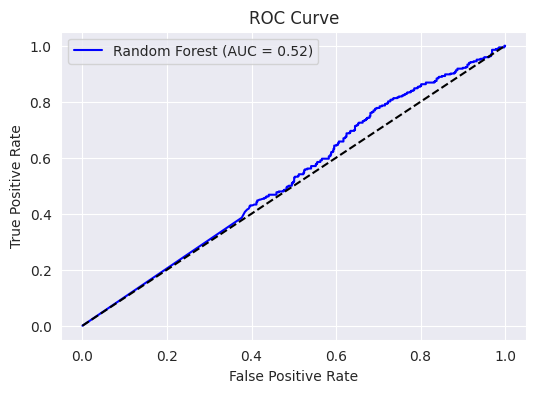

In [83]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()